In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('goldprice.csv')

y = df['Adj Close'] 

gold_features = ['Open','High', 'Low', 'Volume']
X = df[gold_features]
X.head()

,Open,High,Low,Volume
0,154.740005,154.949997,151.710007,21521900
1,154.309998,155.369995,153.899994,18124300
2,155.479996,155.860001,154.360001,12547200
3,156.820007,157.429993,156.580002,9136300
4,156.979996,157.529999,156.130005,11996100


In [3]:
df.isnull().values.any()

False

In [4]:
gold_model = LinearRegression()

gold_model.fit(X, y)

print("Making predicitons for the first 5 entries\n")
print(X.head())
print("\nThe predictions are:\n")
print(gold_model.predict(X.head()))
print("\nThe actual values are:\n")
print(y.head())

Making predicitons for the first 5 entries

         Open        High         Low    Volume
0  154.740005  154.949997  151.710007  21521900
1  154.309998  155.369995  153.899994  18124300
2  155.479996  155.860001  154.360001  12547200
3  156.820007  157.429993  156.580002   9136300
4  156.979996  157.529999  156.130005  11996100

The predictions are:

[152.55743325 154.81709905 154.92457233 157.14066214 156.77663033]

The actual values are:

0    152.330002
1    155.229996
2    154.869995
3    156.979996
4    157.160004
Name: Adj Close, dtype: float64


In [5]:
predicted_adj_close = gold_model.predict(X.head())
print(mean_absolute_error(y.head(),predicted_adj_close))

predicted_adj_close = gold_model.predict(X)
print(mean_absolute_error(y, predicted_adj_close))

0.2477890675386732
0.21905793913671273


In [6]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
gold_model = LinearRegression()
gold_model.fit(train_X, train_y)

val_predictions = gold_model.predict(val_X)
print(mean_absolute_error(val_y,val_predictions))

0.22434694335743763


MAE: 0.22434694335743763


<AxesSubplot:xlabel='Adj Close'>

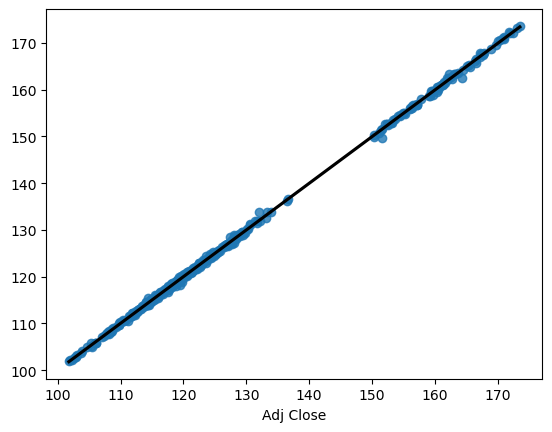

In [7]:
gold_model = LinearRegression()

my_pipeline = Pipeline(steps=[('gold_model', gold_model)])
my_pipeline.fit(train_X, train_y)

preds = my_pipeline.predict(val_X)

mae_score = mean_absolute_error(val_y, preds)
print('MAE:', mae_score)

sns.regplot(x=val_y, y=preds, line_kws={"color":"black"})

In [8]:
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring = 'neg_mean_absolute_error')
print("MAE scores:\n",scores,"\n")
print("Average MAE score (across all ten folds):")
print(scores.mean())

rmse = math.sqrt(mean_squared_error(val_y,preds))
print("\nRMSE is",rmse)

r2 = r2_score(val_y, preds)
print("\nr2 score is", r2)

MAE scores:
 [0.33869539 0.28749731 0.27608857 0.18376062 0.19862309 0.20854433
 0.23916281 0.16176519 0.17072235 0.14091063] 

Average MAE score (across all ten folds):
0.2205770272217656

RMSE is 0.32573358894112825

r2 score is 0.9996725196711937


In [9]:
my_model = XGBRegressor()
my_model.fit(train_X, train_y)

predictions = my_model.predict(val_X)
print("Mean Absolute Error: ",mean_absolute_error(predictions, val_y))

Mean Absolute Error:  0.3337985221452576


C:\Users\Sakthi\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error 0.3232501925031791

RMSE is 0.4868649270362126

r2 score is 0.9992683942525465


<AxesSubplot:xlabel='Adj Close'>

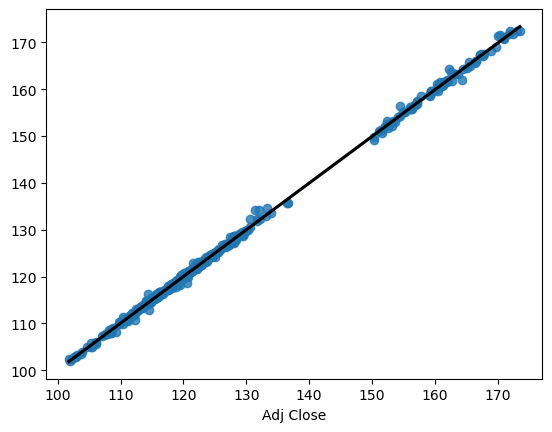

In [12]:
my_model = XGBRegressor(n_estimators=1000,
                        learning_rate=0.03,
                        n_jobs=4)
my_model.fit(train_X, train_y,
            early_stopping_rounds=5,
            eval_set=[(val_X, val_y)],
            verbose=False)

predictions = my_model.predict(val_X)
print("Mean Absolute Error",
      mean_absolute_error(predictions,val_y))

rmse = math.sqrt(mean_squared_error(val_y,predictions))
print("\nRMSE is", rmse)

r2 = r2_score(val_y,predictions)
print("\nr2 score is", r2)

sns.regplot(x=val_y, y=predictions, line_kws={"color": "black"})

In [13]:
plt.style.use("seaborn-whitegrid")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,15-12-2011,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,16-12-2011,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,19-12-2011,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,20-12-2011,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,21-12-2011,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [14]:
X = df.copy()
y = X.pop('Adj Close')
date = X.pop('Date')
X.pop('Close')

0       152.330002
1       155.229996
2       154.869995
3       156.979996
4       157.160004
           ...    
1713    120.019997
1714    119.660004
1715    120.570000
1716    121.059998
1717    121.250000
Name: Close, Length: 1718, dtype: float64

In [15]:
def make_mi_scores (X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

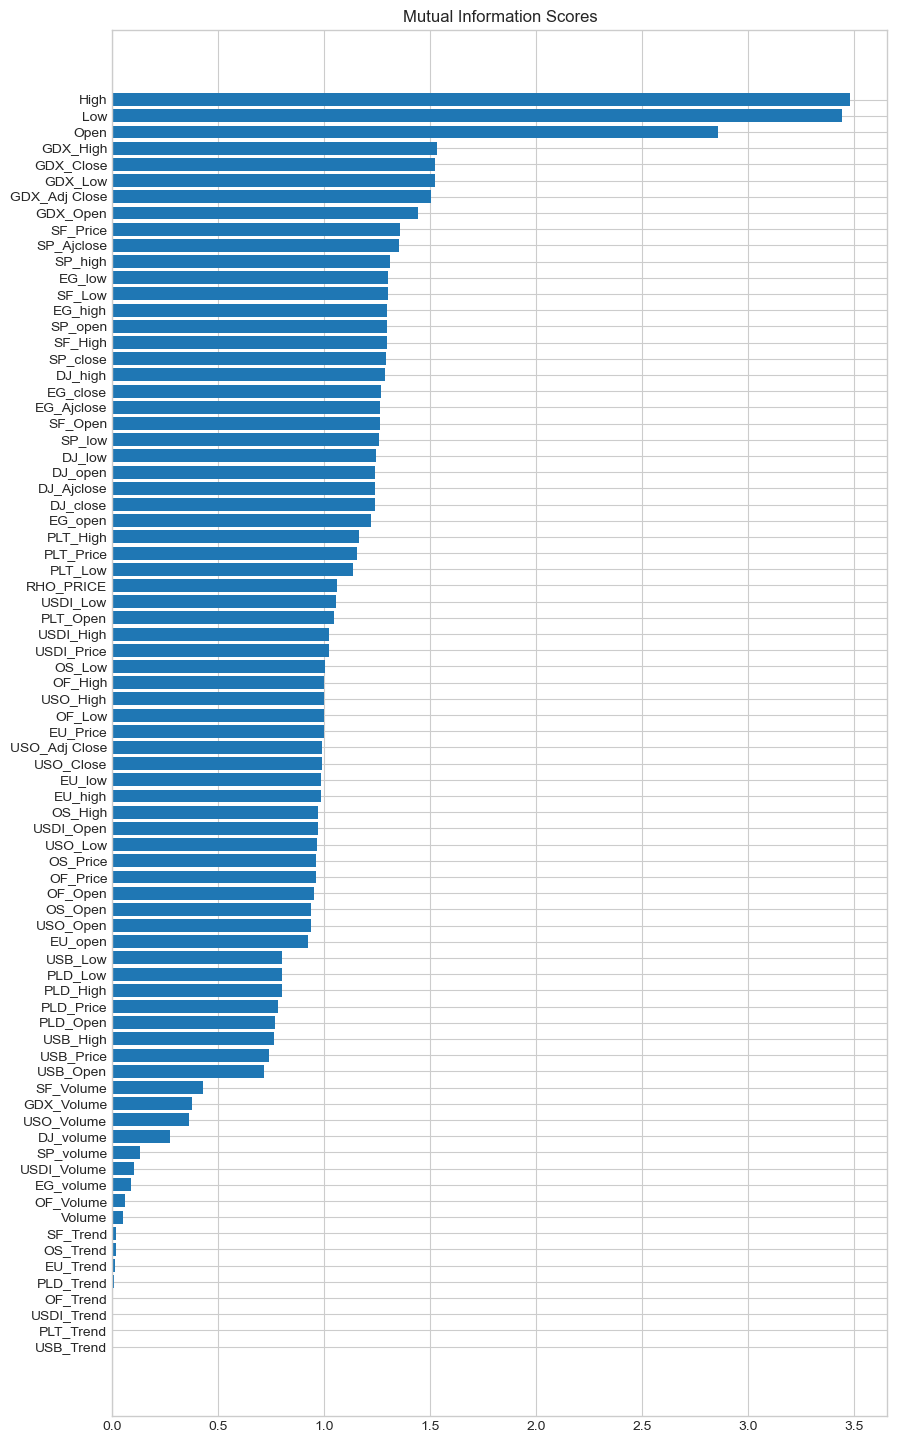

In [16]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100, figsize=(10,18))
plot_mi_scores(mi_scores)

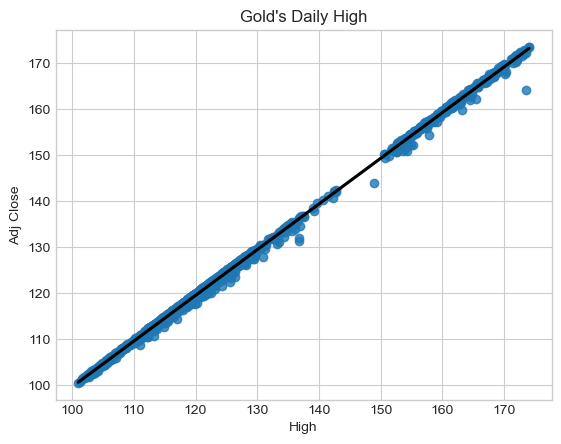

In [17]:
daily_high = sns.regplot(x="High", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Gold's Daily High")

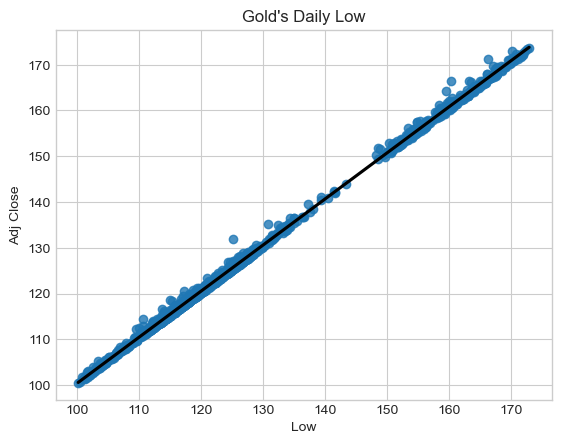

In [18]:
daily_low = sns.regplot(x="Low", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Gold's Daily Low")

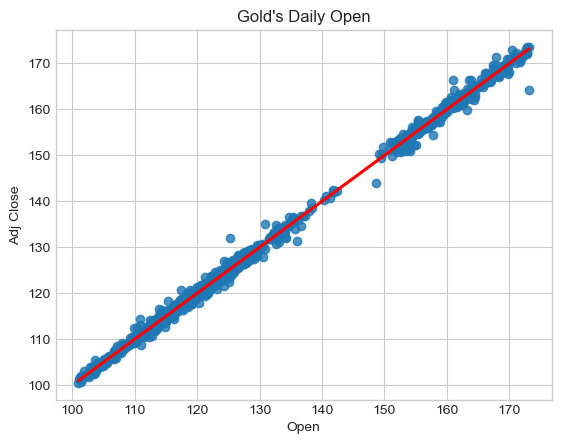

In [19]:
daily_close = sns.regplot(x="Open", y="Adj Close", data=df, line_kws={"color": "red"}).set(title="Gold's Daily Open")

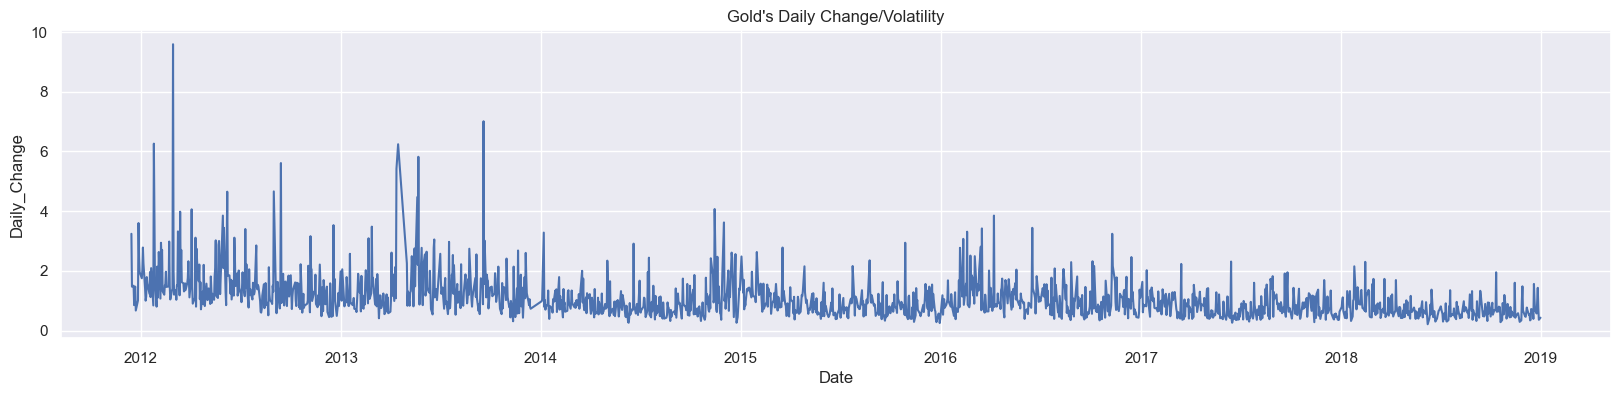

In [25]:
df["Daily_Change"] = abs(X.High - X.Low)

df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')

sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Daily_Change", data=df).set(title="Gold's Daily Change/Volatility")

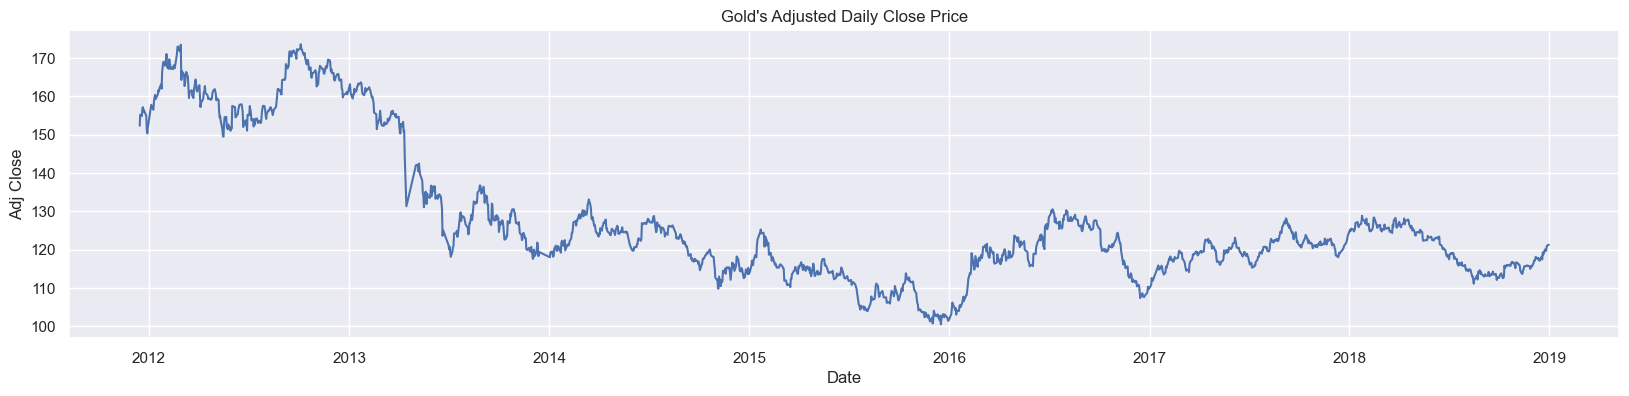

In [26]:
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Adj Close", data=df).set(title="Gold's Adjusted Daily Close Price")

In [27]:
features = ["High", "Low", "Open", "GDX_High", "GDX_Low", "GDX_Close"]

X = df.copy()
y = X.pop('Adj Close')
date = X.pop('Date')
X.pop('Close')
X = X.loc[:, features]

X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [28]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

component_names = [f"PC{i+1}" for i in range (X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,4.786447,1.084283,0.062709,0.089771,0.020374,-0.008956
1,4.895857,1.091385,-0.013283,-0.007822,-0.004370,-0.009334
2,4.823785,0.920197,0.005722,0.050612,-0.030129,-0.008412
3,5.092355,0.949527,-0.042882,-0.010260,0.000476,0.002431
4,5.095494,0.961803,-0.020048,0.008791,0.007451,0.000329


In [29]:
loadings = pd.DataFrame(
    pca.components_.T,       
    columns=component_names, 
    index = X.columns,       
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
High,0.408326,-0.401039,0.529359,-0.274509,0.192727,-0.528883
Low,0.408168,-0.413142,-0.558814,-0.298090,-0.510041,0.037945
Open,0.408236,-0.410488,0.040841,0.563978,0.321422,0.491724
GDX_High,0.408251,0.408309,0.433426,0.271772,-0.632694,0.067782
GDX_Low,0.408318,0.402371,-0.466389,0.320687,0.285792,-0.518978
GDX_Close,0.408190,0.413960,0.021448,-0.583966,0.342671,0.450686


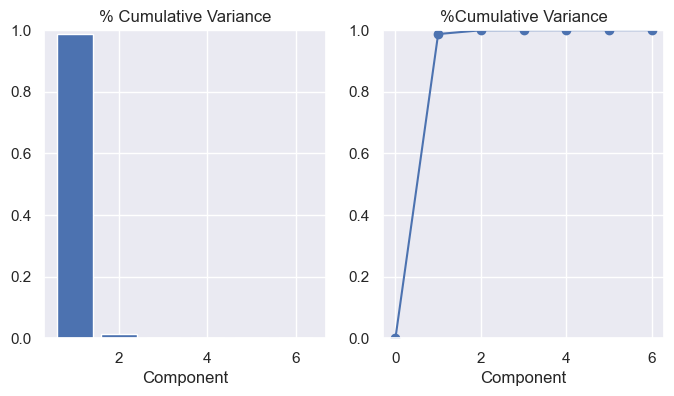

In [30]:
def plot_variance(pca, width=8, dpi=100):
    fig, axs = plt.subplots(1,2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0,cv], "o-")
    axs[1].set(
        xlabel="Component", title="%Cumulative Variance", ylim=(0.0,1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

plot_variance(pca);

In [31]:
mi_scores = make_mi_scores(X_pca, y)
mi_scores

PC1    2.185899
PC2    0.509363
PC3    0.113686
PC5    0.095658
PC4    0.034717
PC6    0.011129
Name: MI Scores, dtype: float64

MAE: 0.20111370689259495


[Text(0.5, 1.0, 'Linear Regression with PCA')]

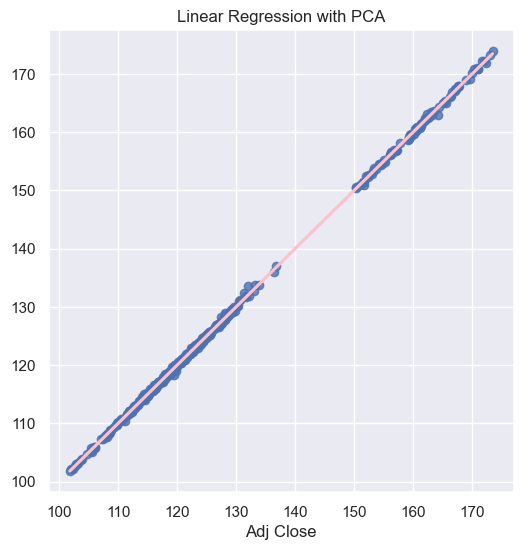

In [33]:
train_X, val_X, train_y, val_y = train_test_split(X_pca, y, random_state = 0)

gold_model = LinearRegression()

my_pipeline = Pipeline(steps=[('gold_model', gold_model)])
my_pipeline.fit(train_X, train_y)

preds = my_pipeline.predict(val_X)

mae_score = mean_absolute_error(val_y, preds)
print('MAE:', mae_score)

sns.set(rc={"figure.figsize":(6,6)})
sns.regplot(x=val_y, y=preds, line_kws={"color":"pink"}).set(title="Linear Regression with PCA")

In [34]:
scores = -1 * cross_val_score(my_pipeline, X_pca, y,
                              cv=10,
                              scoring = 'neg_mean_absolute_error')
print("MAE scores:\n",scores,"\n")
print("Average MAE score (across all ten folds):")
print(scores.mean())
rmse = math.sqrt(mean_squared_error(val_y,preds))
print("\nRMSE is", rmse)
r2 = r2_score(val_y,preds)
print("\nr2 score is", r2)

MAE scores:
 [0.29200777 0.27589726 0.24365488 0.15945436 0.17239864 0.17891691
 0.19767476 0.13222747 0.15118348 0.12333965] 

Average MAE score (across all ten folds):
0.19267551793350668

RMSE is 0.27542712552287196

r2 score is 0.9997658611136764


In [35]:
results = [['Linear Regression', 0.221, 0.326, 0.999672],
           ['Gradient Boosting (XGBoost)', 0.325, 0.490, 0.999259],
           ['Linear Regression with PCA', 0.193, 0.275, 0.999766]]
results_df = pd.DataFrame(results, columns = ['Model Type', 'MAE', 'RMSE', 'r2'])
results_df

,Model Type,MAE,RMSE,r2
0,Linear Regression,0.221,0.326,0.999672
1,Gradient Boosting (XGBoost),0.325,0.490,0.999259
2,Linear Regression with PCA,0.193,0.275,0.999766
